In [1]:
%matplotlib inline
import numpy as np
import pylab as pl
import scipy.special as special
from scipy.optimize import curve_fit
#import mpmath as mm
from scipy.integrate import quad
from scipy.integrate import nquad

# Set plot parameters to make beautiful plots
pl.rcParams['figure.figsize']  = 12, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20  
pl.rcParams['font.sans-serif'] = 'serif'
#pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'medium'

pl.rcParams['xtick.major.size'] = 8     
pl.rcParams['xtick.minor.size'] = 4     
pl.rcParams['xtick.major.pad']  = 8     
pl.rcParams['xtick.minor.pad']  = 8     
pl.rcParams['xtick.color']      = 'k'     
pl.rcParams['xtick.labelsize']  = 'medium'
pl.rcParams['xtick.direction']  = 'in'    

pl.rcParams['ytick.major.size'] = 8     
pl.rcParams['ytick.minor.size'] = 4     
pl.rcParams['ytick.major.pad']  = 8     
pl.rcParams['ytick.minor.pad']  = 8     
pl.rcParams['ytick.color']      = 'k'     
pl.rcParams['ytick.labelsize']  = 'medium'
pl.rcParams['ytick.direction']  = 'in'    






#want to plot the integrand in Eq. 60 of the paper
#with filled in values of I(...), delta(yn), 

#constants in natural units
#m = 1.
#c = 1.
theta_e = 10.
#w without specific declear should of value 10
w = 10.
#theta_e_1 = 10.
#nu_c = 1
#B = 10.
#e = 1


#constants in Gaussian cgs units (values from harmony)
m = 9.1093826e-28
c = 2.99792458e10
e = 4.80320680e-10
B = 30.
#n_e = 4.
h = 6.6260755e-27
k = 1.380658e-16
T_e = m * c**2 * theta_e / k


#variables to be set (frequency, observer angle, width of delta function, electron number density, 
# sum index n)

kappa = 3.5
theta = 12.*np.pi/36.
epsilon = 0.01
n_e = 1.
nu_c = e * B / (2. * np.pi * m * c)
nu = 100 * nu_c
nu_s = (2./9.) * nu_c * theta_e**2 * np.sin(theta)
nu_k = nu_c * w**2. * np.sin(theta)
nu_w = nu_c * (w * kappa)**2 * np.sin(theta)
#n_e_nt = 2.
#p_PL = 2.2
p_PL = 2.5
gamma_50_min = 1.
gamma_50_max = 1000.
#gamma_50_max = 100.
C = 1.
n_dn = (nu / nu_c) * abs(np.sin(theta))
Index_cutoff = 0.001

gamma_cutoff = 100000000000.
#print nu_c

In [2]:
data_kappa_V_anu_3_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_B_30_T_10_theta_60.txt')

data_kappa_V_anu_3_B_30_T_4_theta_80_n_2 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_B_30_T_4_theta_80_n_2.txt')

data_kappa_V_anu_3_B_20_T_5_theta_80_n_2 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_B_20_T_5_theta_80_n_2.txt')


data_kappa_V_anu_3_5_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_10_theta_60.txt')

data_kappa_V_anu_3_5_B_30_T_10_theta_60_n_2 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_10_theta_60_n_2.txt')

data_kappa_V_anu_3_5_B_1_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_1_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_10_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_10_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_20_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_20_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_40_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_40_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_50_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_50_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_60_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_60_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_70_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_70_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_80_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_80_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_100_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_100_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_200_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_200_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_500_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_500_T_10_theta_60.txt')



data_kappa_V_anu_3_5_B_30_T_3_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_3_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_4_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_4_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_5_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_5_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_6_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_6_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_7_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_7_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_8_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_8_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_20_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_20_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_30_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_30_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_50_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_50_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_60_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_60_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_100_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_100_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_200_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_200_theta_60.txt')

data_kappa_V_anu_3_5_B_30_T_10_theta_10 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_10_theta_20 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_10_theta_30 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_10_theta_40 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_10_theta_50 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_10_theta_70 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_10_theta_80 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_10_theta_85 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_10_theta_60.txt')





data_kappa_V_anu_4_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_4_B_30_T_10_theta_60.txt')

data_kappa_V_anu_4_B_30_T_6_theta_70_n_2 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_4_B_30_T_6_theta_70_n_2.txt')



data_kappa_V_anu_4_5_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_4_5_B_30_T_10_theta_60.txt')

data_kappa_V_anu_5_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_5_B_30_T_10_theta_60.txt')

data_kappa_V_anu_5_B_10_T_20_theta_40_n_2 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_5_B_10_T_20_theta_40_n_2.txt')

data_kappa_V_anu_5_5_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_5_5_B_30_T_10_theta_60.txt')
data_kappa_V_anu_6_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_6_B_30_T_10_theta_60.txt')
data_kappa_V_anu_6_5_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_6_5_B_30_T_10_theta_60.txt')
data_kappa_V_anu_7_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_7_B_30_T_10_theta_60.txt')











/home/zhaowei/Documents/ANACONDAWEI/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:823: UserWarning: loadtxt: Empty input file: "/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_B_30_T_4_theta_80_n_2.txt"
  warnings.warn('loadtxt: Empty input file: "%s"' % fname)


In [3]:

def kappa_low(nuratio):
    nu = nuratio * nu_c
    X = nu/nu_w
    norm = 4. * np.pi * special.gamma(kappa-4./3.) / (3.**(7./3.) * special.gamma(kappa-2.))
    dimensional = (n_e * e**2.)/(c * kappa**2. * w**2.)
    ans = norm * dimensional * nu_w * X**(1./3.)
    return ans

def kappa_high(nuratio):
    nu = nuratio * nu_c
    X = nu/nu_w
    term1 = (1./4.) * 3.**((kappa-1.)/2.) * (kappa-2.) * (kappa-1.)
    term2 = special.gamma(kappa/4. - 1./3.) * special.gamma(kappa/4. + 4./3.) 
    term3 = (n_e * e**2. * nu_c * np.sin(theta)) / c
    ans = term1*term2*term3 * X**(-(kappa-2.)/2.)
    return ans




def anu_low(nuratio):
    
    nu = nuratio * nu_c
    
    term1 = n_e * 3. * 3.**(1./6.) * e * (-2. + kappa) * (kappa - 1.) * kappa
    term2 = (2. * np.pi)**(1./3.) * (kappa * w)**(-2. + kappa)
    term3 = (1./np.sin(theta)) * special.gamma(5./3.)
    term4 = special.hyp2f1(-1./3. + kappa, 1. + kappa, 2./3. + kappa, -kappa * w)
    term5 = B*(-1.+3.*kappa)*((m*nu)/(B*e*np.sin(theta)))**(5./3.)
    
    f = term1*term2*term3*term4/term5
    
    
    return f
    

    
    
def anu_high(nuratio):
    
    nu = nuratio * nu_c
    
    term1 = n_e/(3. * B * (2. + kappa))
    term2 = 2.**((-1./2.) - kappa) * e * (- 2. + kappa ) * (-1. + kappa) * kappa
    term3 = np.pi**(1. - kappa) * (kappa * w)**(-2. + kappa)
    term4 = 1./np.sin(theta)
    term5 = 2.**(1. + kappa/2.) * np.pi**(kappa/2.) * special.gamma(2. + kappa/2.)
    term6 = 2**(1. + kappa/2.) * np.pi**(kappa/2.) + kappa * (2. * np.pi)**(kappa/2.)
    term7 = special.gammainc(1. + kappa/2., 2. * c * m * nu * np.pi / (B * e * np.sin(theta)))
    term8 = (B * e * np.sin(theta)/(c * m * nu))**((3. + kappa)/2.)
    
    f = term1 * term2 * term3 * term4 * (term5 - term6 * term7) * term8

    return f


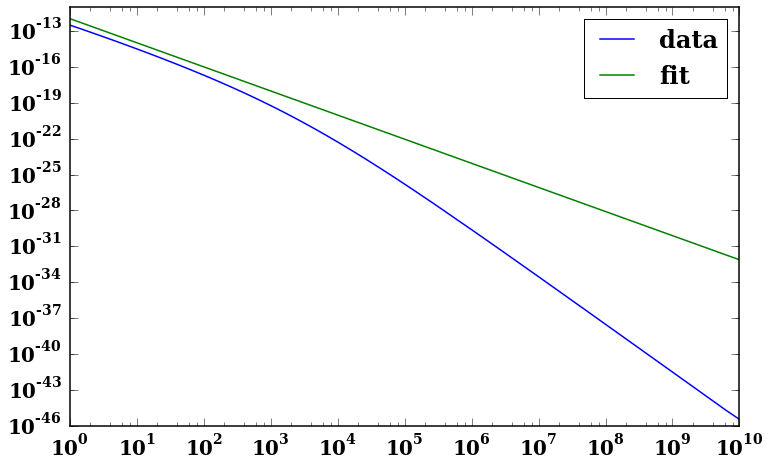

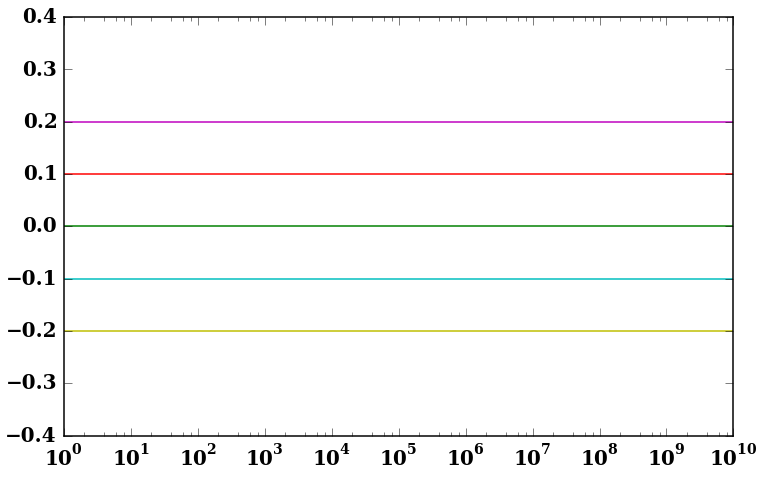

In [508]:
x_8 = data_kappa_V_anu_3_B_30_T_10_theta_60[:,0]
y_8 = -data_kappa_V_anu_3_B_30_T_10_theta_60[:,1]

AA = 4.3e-17

BB = -0.35

B_DEPEN = 0.37035541 * B**(0.30541597) + 0.00070334 * B + (-0.07526806)

W_DEPEN_LO = 2.01766388 * w**(-0.31651551) + 0.02650977

THETA_DEPEN_LO = 1.19245085 * np.sin(theta)**(-0.56950206) + 0.05916943 * np.sin(theta) + (-0.34222893)

def anu_low_8(nuratio):
    
    nu = nuratio * nu_c
    
    f = THETA_DEPEN_LO * W_DEPEN_LO * B_DEPEN * AA * anu_low(nuratio) * nu**BB
    return f

pl.loglog(x_8, y_8, label = 'data')
pl.loglog(x_8, anu_low_8(x_8), label = 'fit')

pl.legend()
pl.show()


pl.semilogx(x_8, anu_low_8(x_8)/y_8 - 1.)

pl.semilogx(x_8, 0*x_8)
pl.semilogx(x_8, 0*x_8 + 0.1)
pl.semilogx(x_8, 0*x_8 - 0.1)
pl.semilogx(x_8, 0*x_8 + 0.2)
pl.semilogx(x_8, 0*x_8 - 0.2)
pl.ylim([-0.4,0.4])


pl.legend()
pl.show()







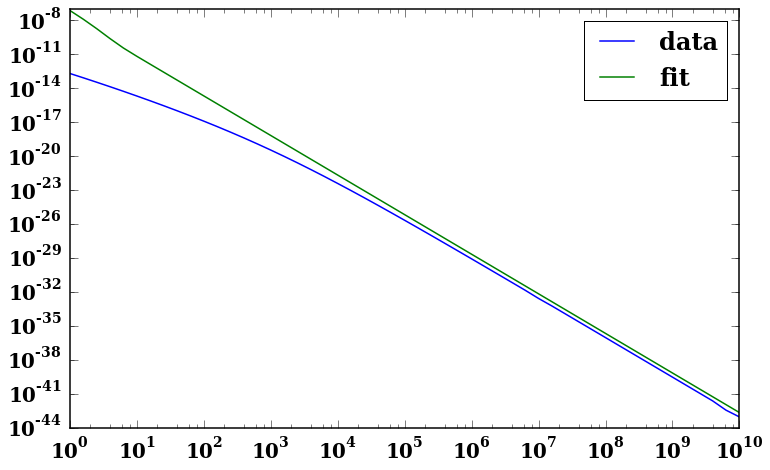

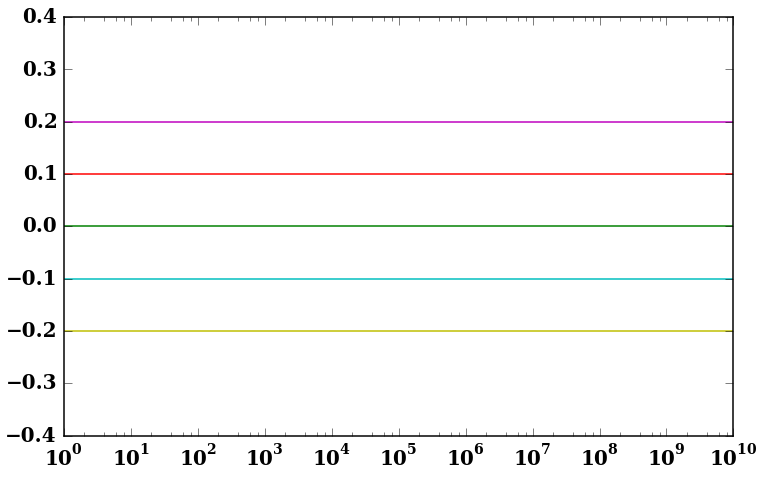

In [504]:
x_9 = data_kappa_V_anu_3_B_20_T_5_theta_80_n_2[:,0]
y_9 = -data_kappa_V_anu_3_B_20_T_5_theta_80_n_2[:,1]

CC = 2.45724759e+06 * kappa**(-5.07142098e+00) + 1.07728951e+00 * kappa**(4.05283927e+00) + 7.55591159e+03

DD = -50./100.

B_DEPEN_HI = 0.1545726 * B**(0.54856329) + (-0.00132344) * B + 0.03798178

W_DEPEN_HI = (-2.02964209) * w**(-2.38532888) + 1.00071312

THETA_DEPEN_HI = 0.766432 * np.sin(theta)**(-2.22348911) + 0.05658272 * np.sin(theta) + (-0.09856394)

def anu_high_9(nuratio):
    
    nu = nuratio * nu_c
    
    f = THETA_DEPEN_HI * W_DEPEN_HI * B_DEPEN_HI * CC * anu_high(nuratio) * nu**DD
    
    return f


pl.loglog(x_9, y_9, label = 'data')
pl.loglog(x_9, anu_high_9(x_9), label = 'fit')

pl.legend()
pl.show()

pl.semilogx(x_9, anu_high_9(x_9)/y_9 - 1.)

pl.semilogx(x_9, 0*x_9)
pl.semilogx(x_9, 0*x_9 + 0.1)
pl.semilogx(x_9, 0*x_9 - 0.1)
pl.semilogx(x_9, 0*x_9 + 0.2)
pl.semilogx(x_9, 0*x_9 - 0.2)

pl.ylim([-0.4, 0.4])

pl.legend()
pl.show()











(array([  2.45723495e+06,  -5.07141558e+00,   1.07732960e+00,
         4.05282156e+00,   7.55590246e+03]), array([[  1.51471085e+12,  -6.31303330e+05,  -3.49578502e+06,
          1.52552993e+06,   8.97413969e+08],
       [ -6.31303330e+05,   2.63657951e-01,   1.48655400e+00,
         -6.49094700e-01,  -3.79289608e+02],
       [ -3.49578502e+06,   1.48655400e+00,   1.04271299e+01,
         -4.59553854e+00,  -2.42698665e+03],
       [  1.52552993e+06,  -6.49094700e-01,  -4.59553854e+00,
          2.02658335e+00,   1.06446147e+03],
       [  8.97413969e+08,  -3.79289608e+02,  -2.42698665e+03,
          1.06446147e+03,   5.91196909e+05]]))


(8000, 18000)

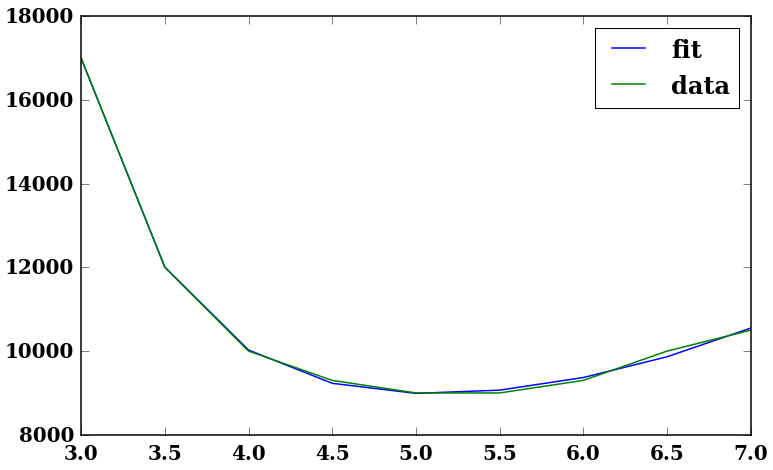

In [132]:
data_kappa_V_anu_high_CC = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_high_CC.txt')

x_10 = data_kappa_V_anu_high_CC[:,0]
y_10 = data_kappa_V_anu_high_CC[:,1]


def func_115(x, a, b, d, e, f):
    f = a * x**b + d * x**e + f
    return f

#print curve_fit(func_115, x_10, y_10, p0 = [2.45724759e+06,  -5.07142098e+00,   1.07728951e+00, 4.05283927e+00,   7.55591159e+03])

pl.plot(x_10, func_115(x_10,2.45724759e+06, -5.07142098e+00, 1.07728951e+00, 4.05283927e+00,7.55591159e+03), label = 'fit')

pl.plot(x_10, y_10, label = 'data')

pl.legend()

pl.ylim([8000, 18000])



(array([ 0.37035541,  0.30541597,  0.00070334, -0.07526806]), array([[  1.75698836e-03,  -8.48009267e-04,   6.82392706e-06,
         -2.03538972e-03],
       [ -8.48009267e-04,   4.14673717e-04,  -3.44160712e-06,
          9.66868612e-04],
       [  6.82392706e-06,  -3.44160712e-06,   3.10850558e-08,
         -7.52793270e-06],
       [ -2.03538972e-03,   9.66868612e-04,  -7.52793270e-06,
          2.41621851e-03]]))


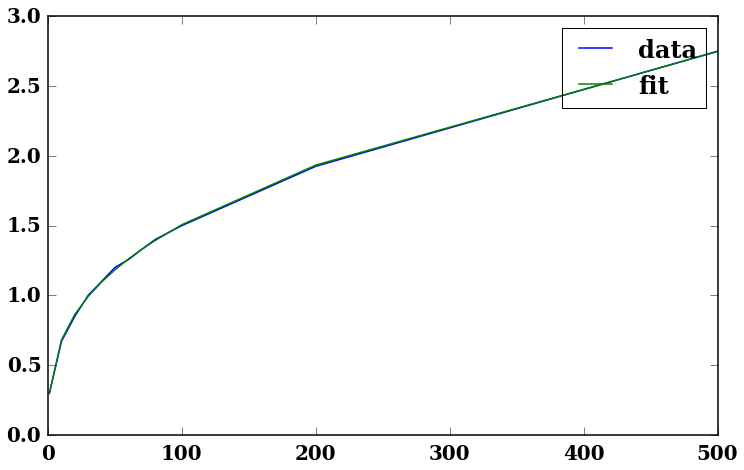

In [144]:
data_kappa_V_anu_low_B_DEPEN = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_low_B_DEPEN.txt')

x_133 = data_kappa_V_anu_low_B_DEPEN[:,0]
y_133 = data_kappa_V_anu_low_B_DEPEN[:,1]

def func_133(x,a,b, d, e):
    f = a * x**b + d * x + e 
    return f


print curve_fit(func_133, x_133, y_133, p0 = [0.37035539,  0.30541598,  0.00070334, -0.07526804])


pl.plot(x_133, y_133, label = 'data')
pl.plot(x_133, func_133(x_133, 0.37035541,  0.30541597,  0.00070334, -0.07526806), label = 'fit')

pl.legend()


(array([ 0.1545726 ,  0.54856329, -0.00132344,  0.03798178]), array([[  1.10411400e-04,  -1.87300266e-04,   4.61044949e-06,
         -1.88120728e-04],
       [ -1.87300266e-04,   3.24721486e-04,  -8.21594067e-06,
          3.05093883e-04],
       [  4.61044949e-06,  -8.21594067e-06,   2.15313774e-07,
         -7.10955147e-06],
       [ -1.88120728e-04,   3.05093883e-04,  -7.10955147e-06,
          3.61665788e-04]]))


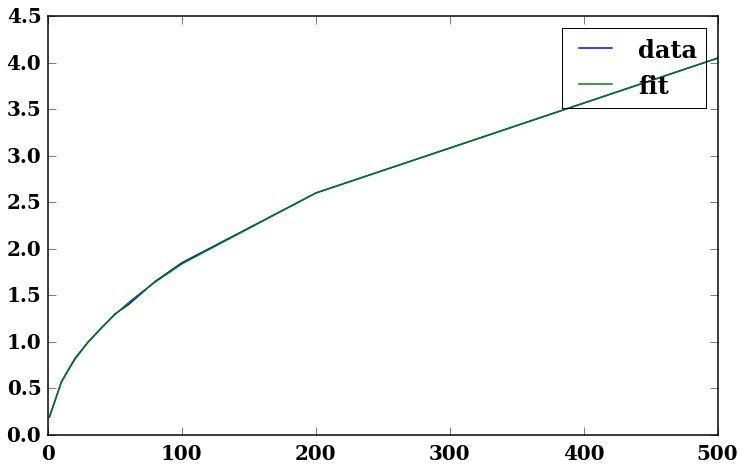

In [172]:
data_kappa_V_anu_high_B_DEPEN = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_high_B_DEPEN.txt')

x_134 = data_kappa_V_anu_high_B_DEPEN[:,0]
y_134 = data_kappa_V_anu_high_B_DEPEN[:,1]

def func_134(x,a,b, d, e):
    f = a * x**b + d * x + e 
    return f


print curve_fit(func_134, x_134, y_134, p0 = [ 0.15457261,  0.54856328, -0.00132344,  0.03798176])


pl.plot(x_134, y_134, label = 'data')
pl.plot(x_134, func_134(x_134, 0.1545726 ,  0.54856329, -0.00132344,  0.03798178), label = 'fit')

pl.legend()


(array([ 2.01766388, -0.31651551,  0.02650977]), array([[ 0.00041574,  0.0001903 , -0.00058748],
       [ 0.0001903 ,  0.00022037, -0.00054693],
       [-0.00058748, -0.00054693,  0.00141671]]))


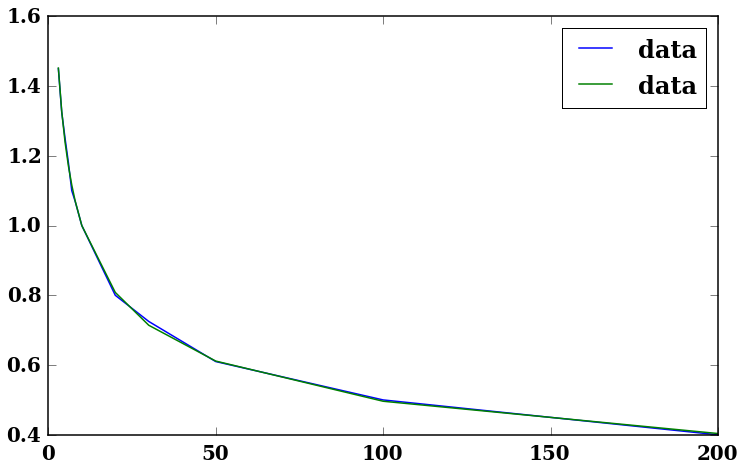

In [281]:
data_kappa_V_anu_low_W_DEPEN = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_low_W_DEPEN.txt')
x_173 = data_kappa_V_anu_low_W_DEPEN[:,0]
y_173 = data_kappa_V_anu_low_W_DEPEN[:,1]

def func_173(x,a,b, c):
    f = a * x**b + c
    return f

print curve_fit(func_173, x_173, y_173, p0 = [ 1.99528096, -0.32951816,  0.0633018 ])

pl.plot(x_173, y_173, label = 'data')

pl.plot(x_173, func_173(x_173,  2.01766388, -0.31651551,  0.02650977), label = 'data')

pl.legend()


(array([-2.02964209, -2.38532888,  1.00071312]), array([[  3.14073421e-01,   1.32508236e-01,   9.44747811e-04],
       [  1.32508236e-01,   5.77931026e-02,   4.74240495e-04],
       [  9.44747811e-04,   4.74240495e-04,   1.02627501e-05]]))


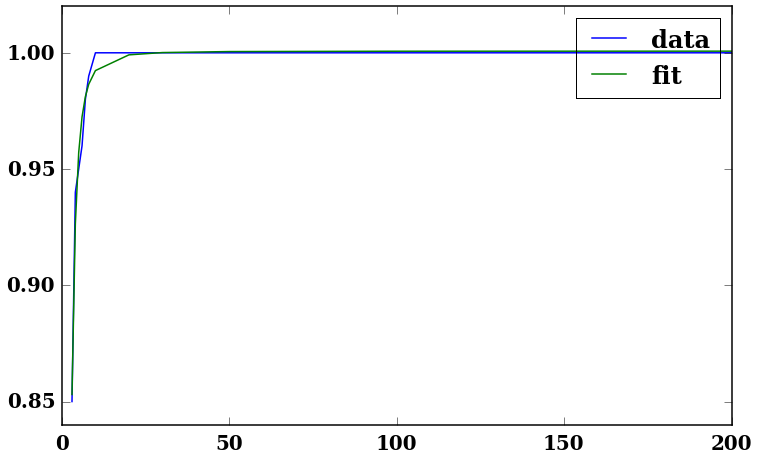

In [302]:
data_kappa_V_anu_high_W_DEPEN = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_high_W_DEPEN.txt')
x_174 = data_kappa_V_anu_high_W_DEPEN[:,0]
y_174 = data_kappa_V_anu_high_W_DEPEN[:,1]

def func_174(x,a,b, d):
    f = a * x**b + d
    return f

print curve_fit(func_174, x_174, y_174, p0 = [-2.02964194, -2.38532882,  1.00071312])

pl.plot(x_174, y_174, label = 'data')

pl.plot(x_174, func_174(x_174,  -2.02964209, -2.38532888,  1.00071312), label = 'fit')

pl.legend()


In [308]:
print func_174(6,  -2.02964209, -2.38532888,  1.00071312)

0.972446569677


(array([ 1.19245085, -0.56950206,  0.05916943, -0.34222893]), array([[ 0.30571076,  0.07639847,  0.11368067, -0.41732491],
       [ 0.07639847,  0.01912052,  0.02825258, -0.10415003],
       [ 0.11368067,  0.02825258,  0.0433634 , -0.15612188],
       [-0.41732491, -0.10415003, -0.15612188,  0.5705188 ]]))


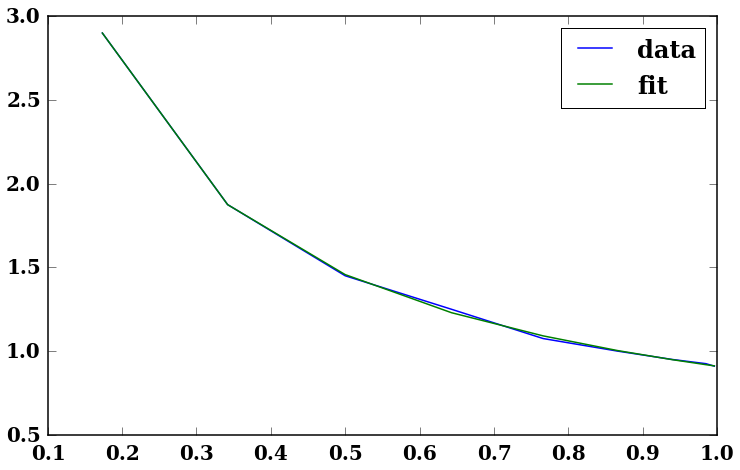

In [441]:
data_kappa_V_anu_low_THETA_DEPEN = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_low_THETA_DEPEN.txt')

x_309 = np.sin(data_kappa_V_anu_low_THETA_DEPEN[:,0] * np.pi / 180.)
y_309 = data_kappa_V_anu_low_THETA_DEPEN[:,1]

def func_309(x, a, b, d, e):
    f = a * x**b + d * x + e
    return f

print curve_fit(func_309, x_309, y_309, p0 = [ 1.19245085, -0.56950206,  0.05916943, -0.34222893])

pl.plot(x_309, y_309, label = 'data')

pl.plot(x_309, func_309(x_309,  1.19245085, -0.56950206,  0.05916943, -0.34222893), label = 'fit')

pl.legend()




(array([ 0.73203949, -2.69724321,  0.28751811, -0.33590545]), array([[ 0.00020945,  0.00015242,  0.00184849, -0.00193257],
       [ 0.00015242,  0.00011104,  0.00133163, -0.00139484],
       [ 0.00184849,  0.00133163,  0.019371  , -0.01941184],
       [-0.00193257, -0.00139484, -0.01941184,  0.01978602]]))


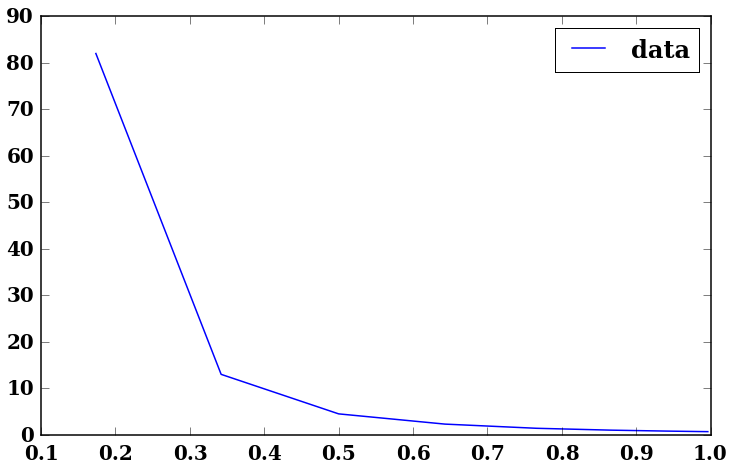

In [5]:
data_kappa_V_anu_high_THETA_DEPEN = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_high_THETA_DEPEN.txt')

x_442 = np.sin(data_kappa_V_anu_high_THETA_DEPEN[:,0] * np.pi / 180.)
y_442 = data_kappa_V_anu_high_THETA_DEPEN[:,1]

def func_442(x ,a, b, d, f):
    f = a * x**b + d * x + f
    return f

print curve_fit(func_442, x_442, y_442, p0 = [7.19773472e+01,  -2.06995565e+00,   1.25880568e-04,-5.17300969e-03])


pl.plot(x_442, y_442, label = 'data')
#pl.plot(x_442, func_442(x_442,  0.766432  , -2.22348911,  0.05658272, -0.09856394), label = 'fit')

pl.legend()









In [ ]:
func_442(x_442,  7.19773477e+01,  -2.06995566e+00,   1.25880562e-04, -5.17300919e-03